<a href="https://www.kaggle.com/code/aneevinay/stress-analysis-in-students?scriptVersionId=258081594" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv
/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv


# Load Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read the Datasets

In [3]:
df=pd.read_csv('/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv')
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


# Check the Data

## Check missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [5]:
df.isnull().sum()

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

There is no missed values

In [6]:
df.duplicated().sum()

27

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                816 non-null    int64 
 1   Age                                                                   816 non-null    int64 
 2   Have you recently experienced stress in your life?                    816 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   816 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               816 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        816 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             816 non-null    int64 
 7   Have you been

## Summary Statistics

In [9]:
df.describe()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,0.356618,20.080882,3.018382,2.761029,2.541667,2.796569,2.664216,2.622549,2.672794,2.691176,...,2.502451,2.447304,2.487745,2.514706,2.425245,2.580882,2.623775,2.752451,3.257353,2.403186
std,0.479294,5.513025,1.128941,1.123317,1.209666,1.254308,1.261995,1.257003,1.303904,1.303218,...,1.240421,1.196997,1.197071,1.249208,1.257829,1.283526,1.299126,1.261995,1.206300,1.117815
min,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,19.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,19.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
75%,1.000000,20.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The Dataset contain age values from 14 to 100.and all other values are scaled i 1 to 5.

# Data Exploration

## univariate analysis

### Gender

In [10]:
df['Gender'].value_counts()

Gender
0    525
1    291
Name: count, dtype: int64

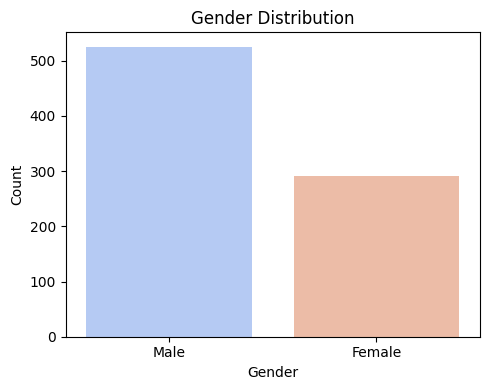

In [11]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])  
plt.tight_layout()
plt.show()

The dataset shows a gender imbalance, with a higher number of male respondents compared to female

### Age

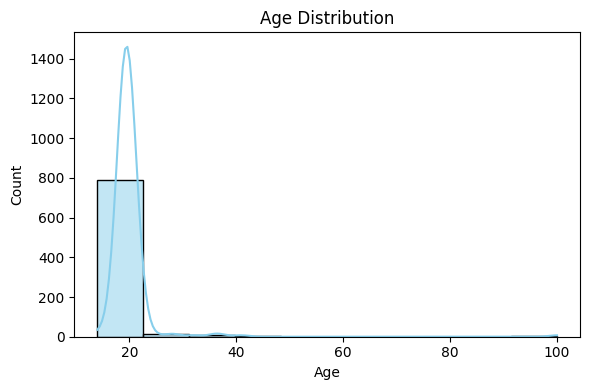

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The age distribution in postively skewed.That is most of the age in 14 to 24. so for clear visibility i would like to filter age below 30

In [13]:
df = df[df['Age'] < 30]

now i would like to check what deference, it make in df

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                800 non-null    int64 
 1   Age                                                                   800 non-null    int64 
 2   Have you recently experienced stress in your life?                    800 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   800 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               800 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        800 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             800 non-null    int64 
 7   Have you been

only 16 rows filtered out.

In [15]:
df['Gender'].value_counts()

Gender
0    514
1    286
Name: count, dtype: int64

relatively no change in gender inbalance

### Scale variables

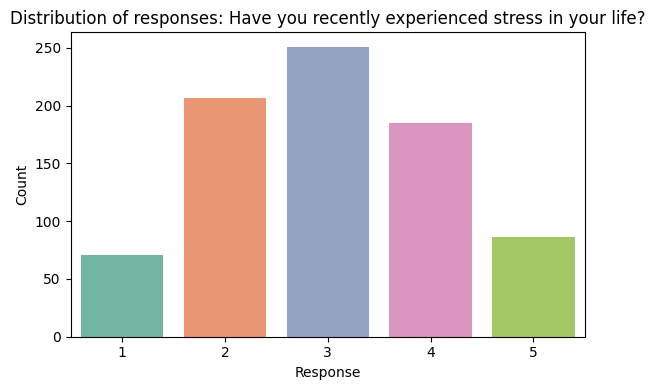

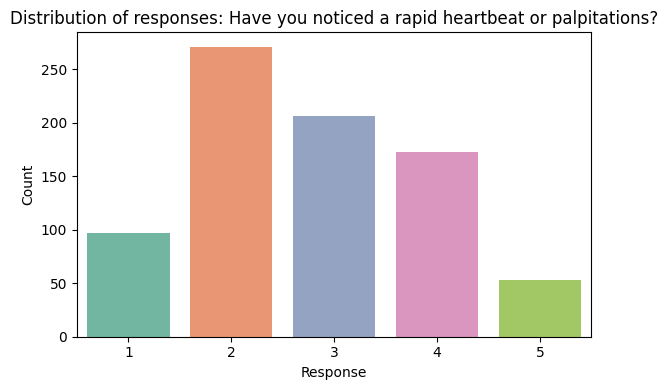

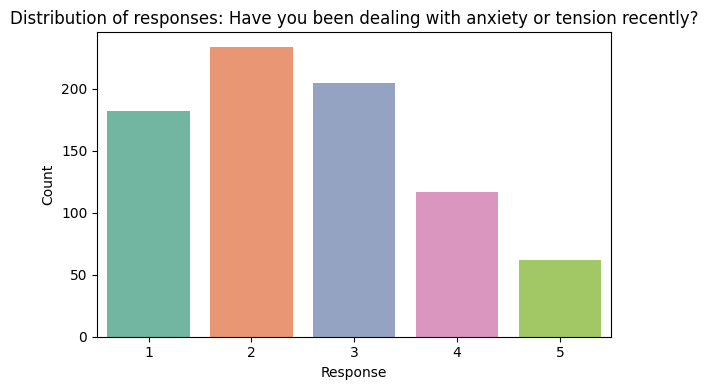

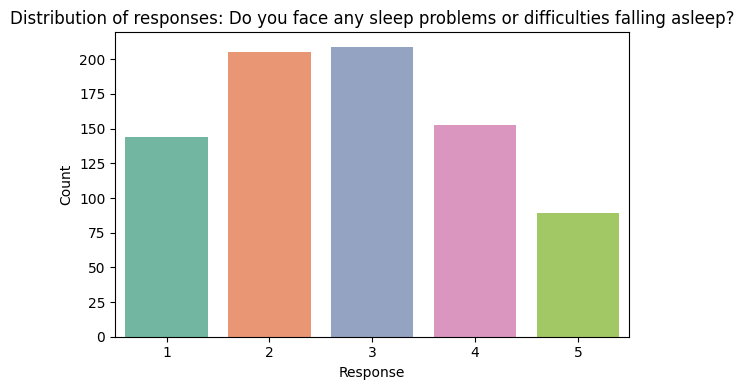

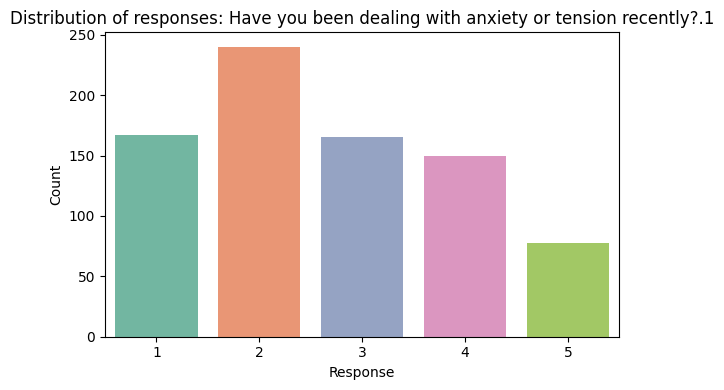

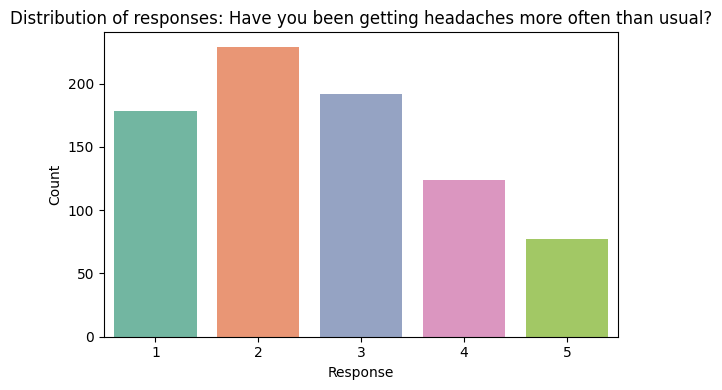

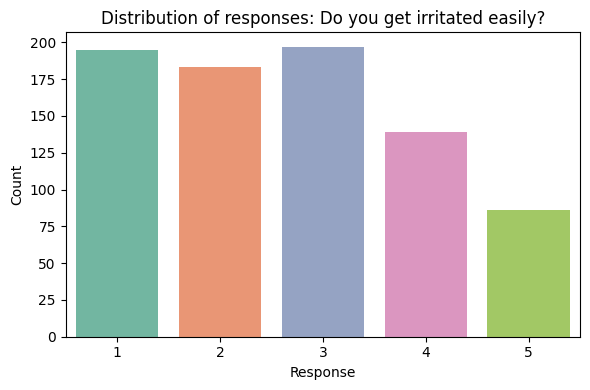

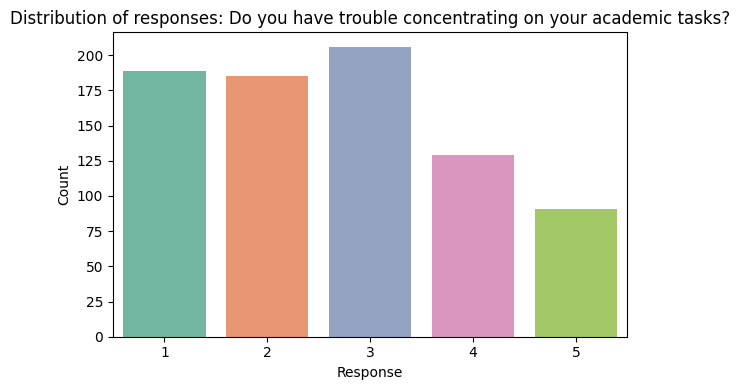

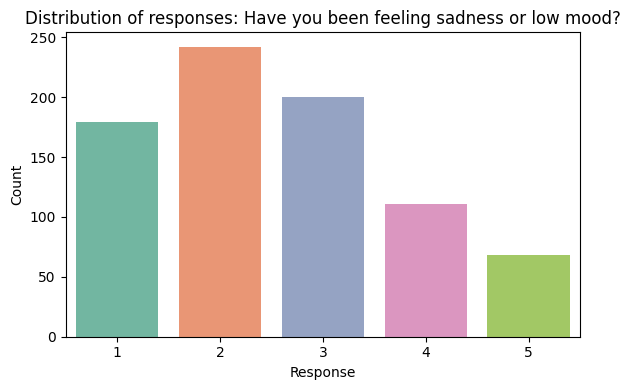

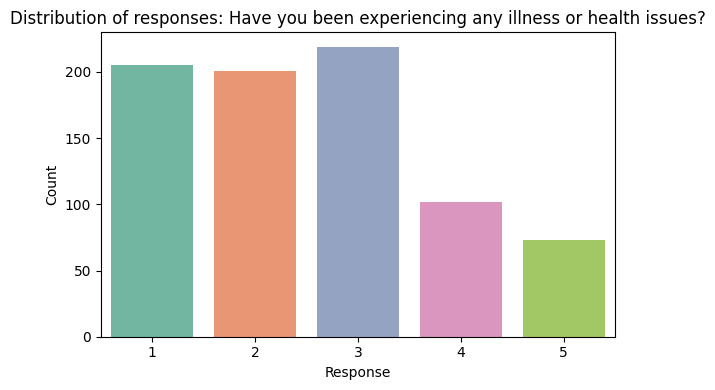

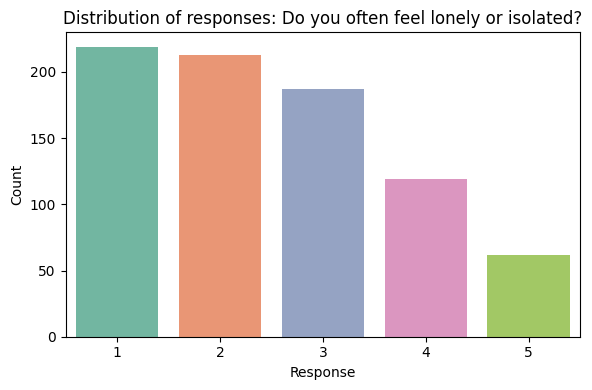

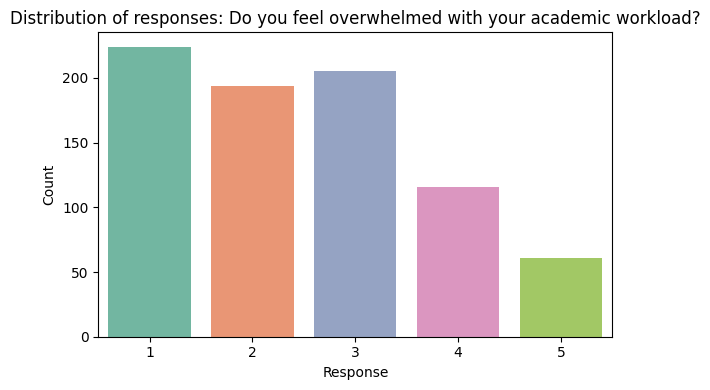

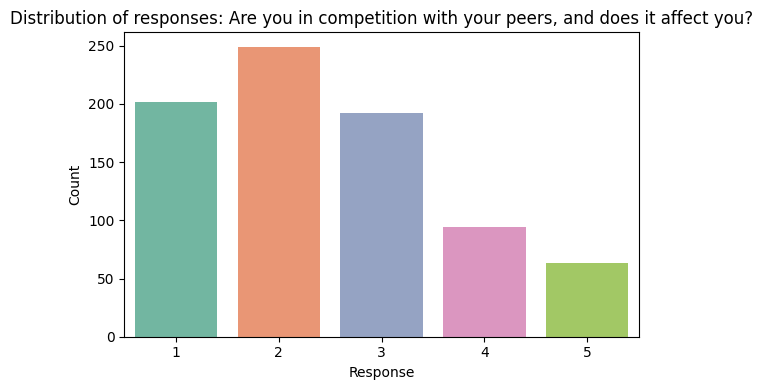

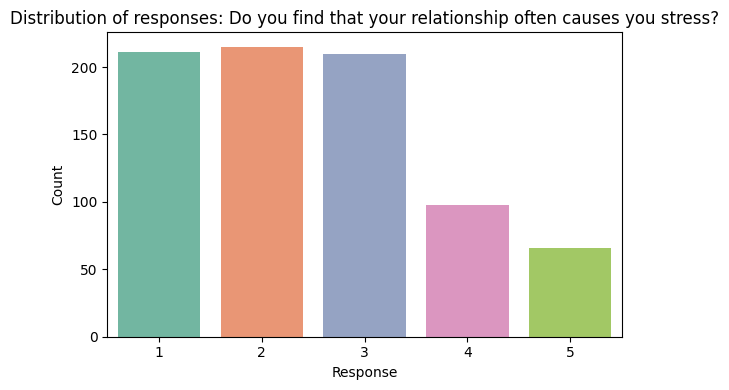

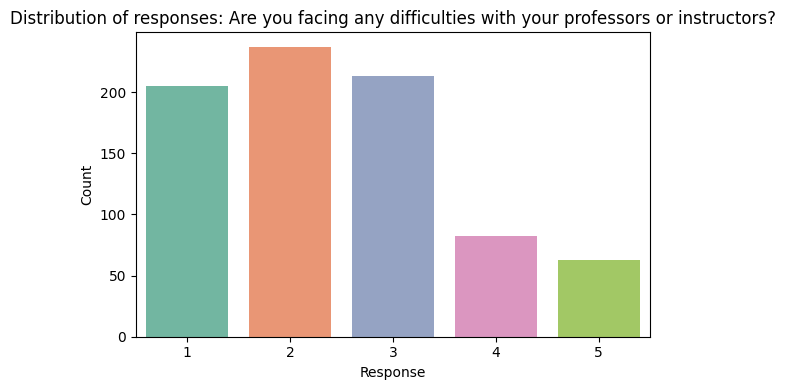

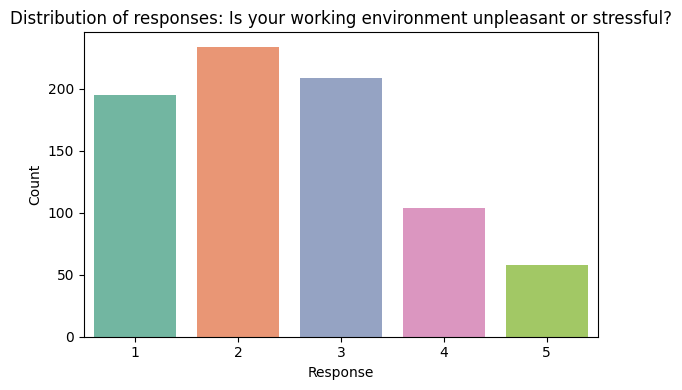

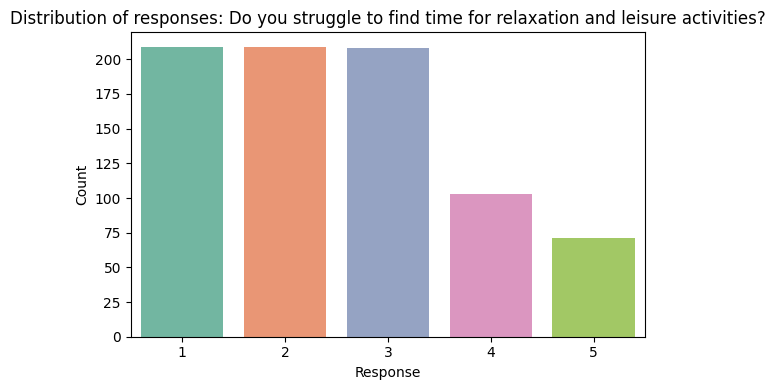

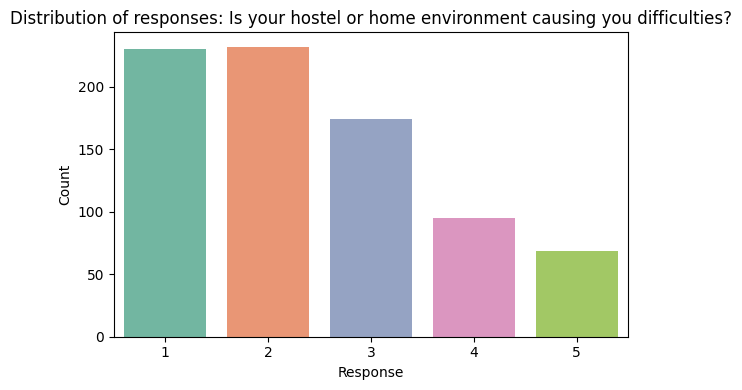

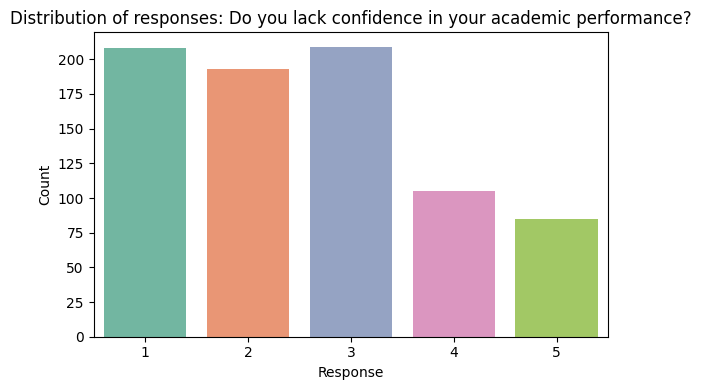

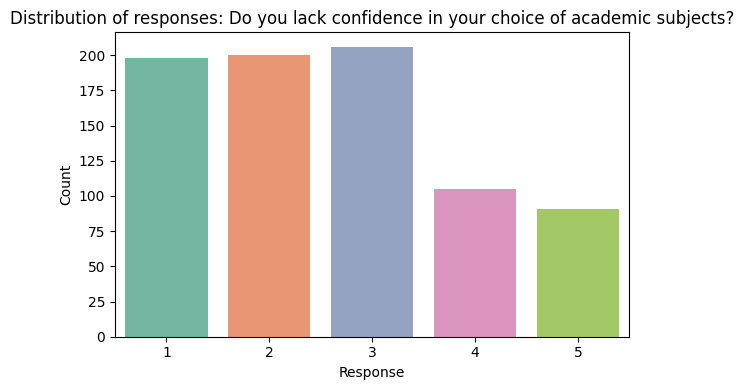

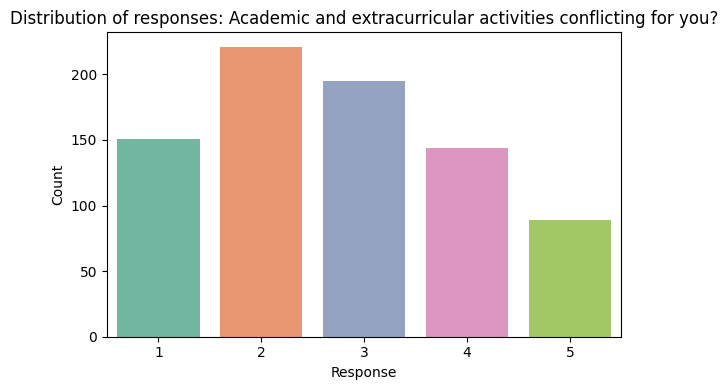

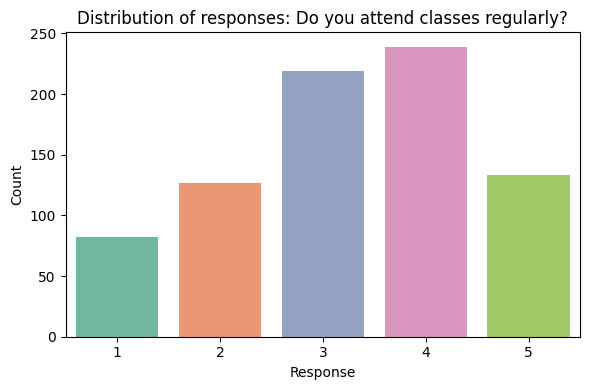

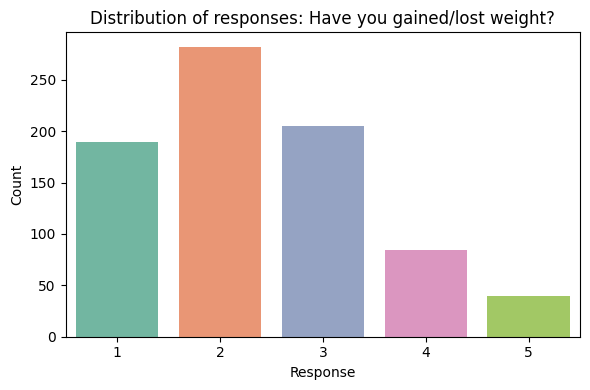

In [16]:
ordinal_cols = df.select_dtypes(include='int64').columns.drop(['Gender', 'Age'])

for col in ordinal_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of responses: {col}', fontsize=12)
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.xticks() 
    plt.tight_layout()
    plt.show()

from the analysis, everyone who attended the survey had stress and the life stress,tensions ,sleep problems ...etc are in their life

### Category analysis

In [17]:
df['Which type of stress do you primarily experience?'].unique()

array(['Eustress (Positive Stress) - Stress that motivates and enhances performance.',
       'No Stress - Currently experiencing minimal to no stress.',
       'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.'],
      dtype=object)

In [18]:
df['Which type of stress do you primarily experience?'].value_counts()

Which type of stress do you primarily experience?
Eustress (Positive Stress) - Stress that motivates and enhances performance.       731
No Stress - Currently experiencing minimal to no stress.                            41
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     28
Name: count, dtype: int64

In [19]:
df['Which type of stress do you primarily experience?'] = df['Which type of stress do you primarily experience?'].map({
    'Eustress (Positive Stress) - Stress that motivates and enhances performance.': 'Eustress',
    'No Stress - Currently experiencing minimal to no stress.': 'No Stress',
    'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.': 'Distress'
})

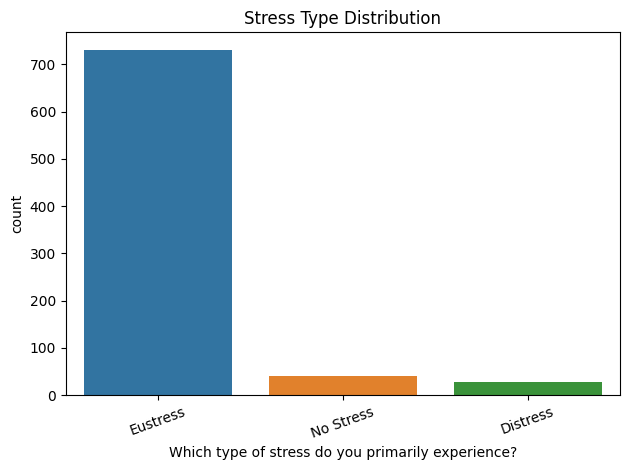

In [20]:
sns.countplot(x='Which type of stress do you primarily experience?', data=df)
plt.title('Stress Type Distribution')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Most of them have postive stress which motivates them perform better

## Correlation Analysis

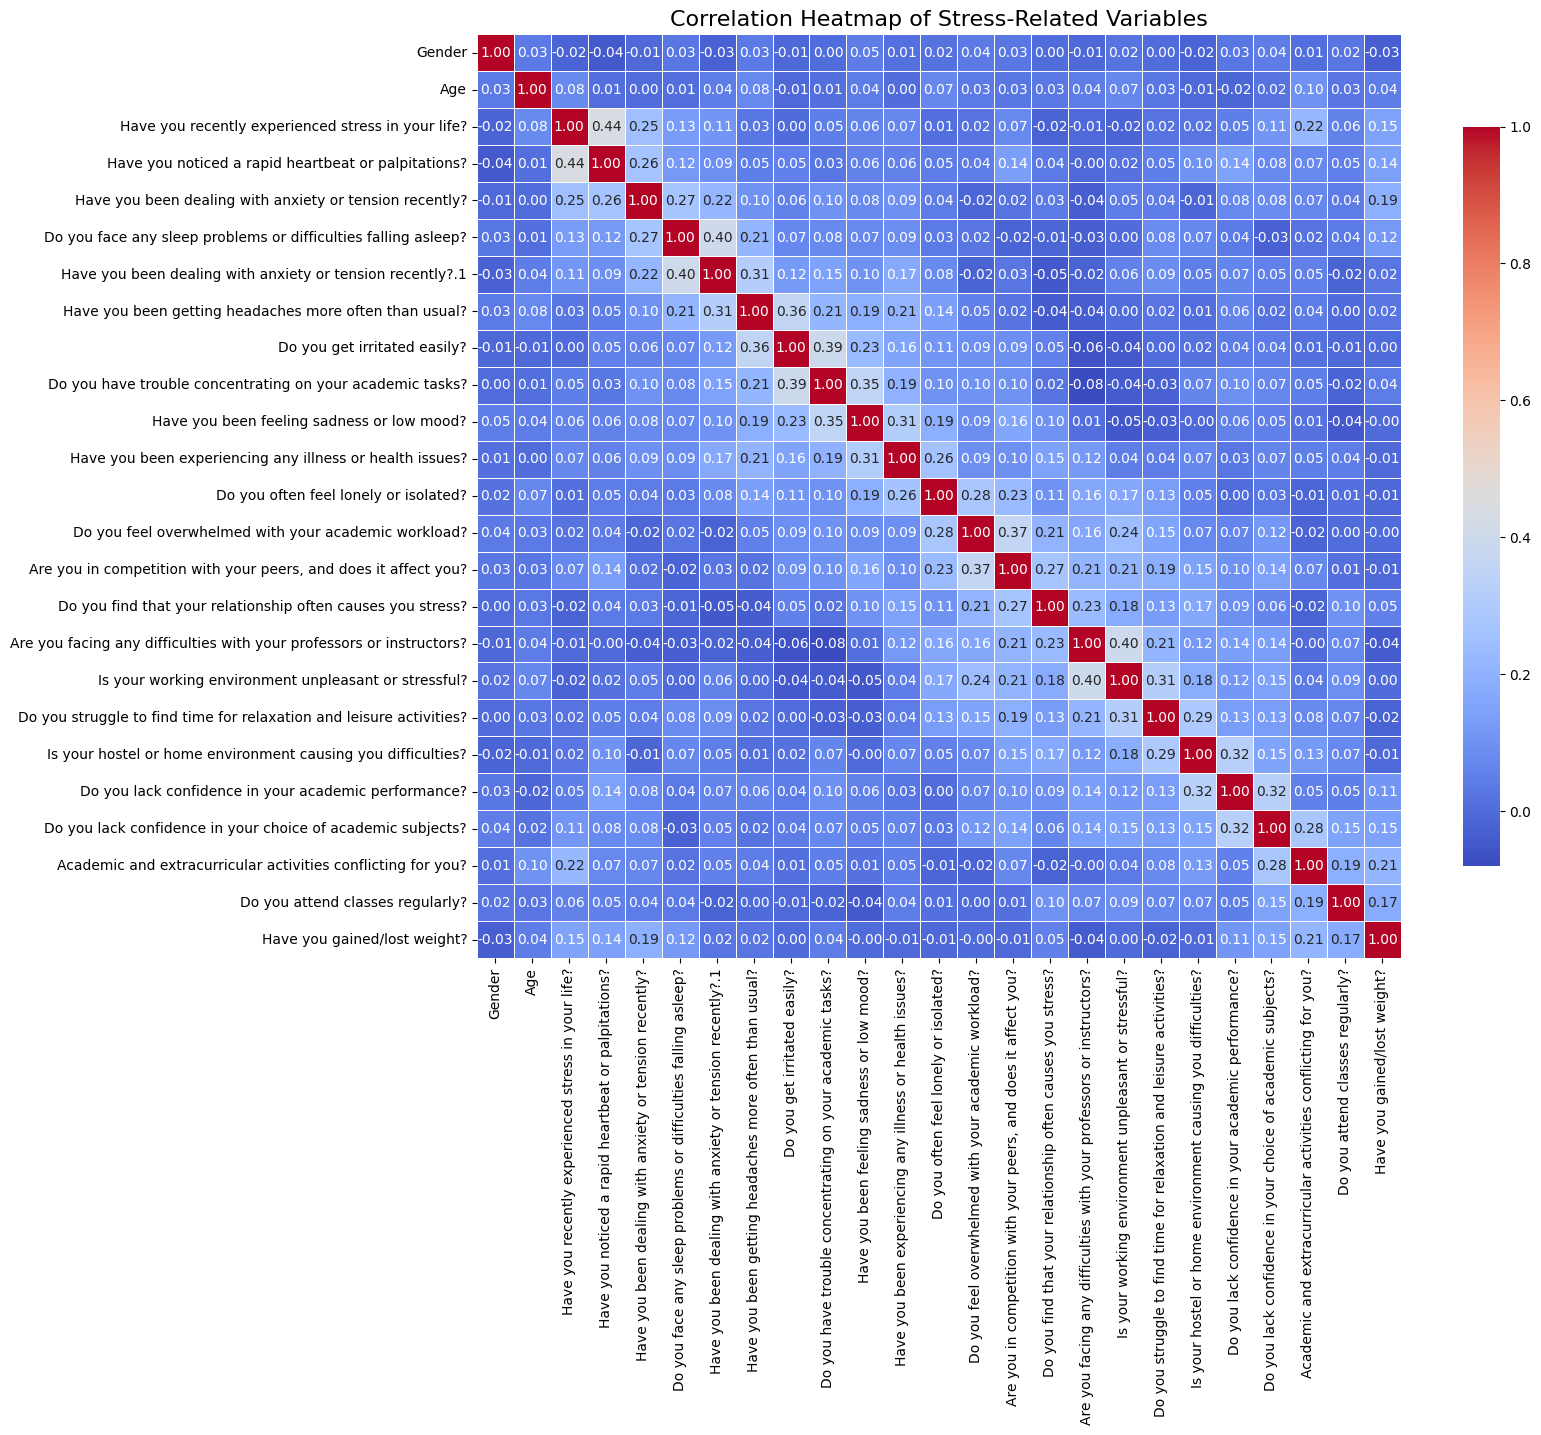

In [21]:
corr = df.select_dtypes(include='int64').corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})

plt.title("Correlation Heatmap of Stress-Related Variables", fontsize=16)
plt.show()

# Bivariate Analysis

### Gender vs Stress type

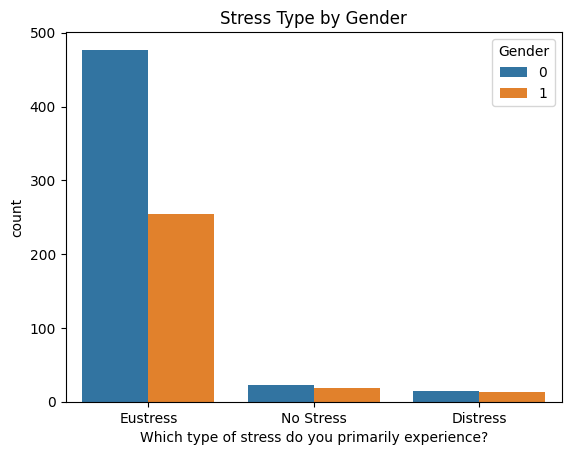

In [22]:
sns.countplot(data=df, x='Which type of stress do you primarily experience?', hue='Gender')
plt.title("Stress Type by Gender")
plt.show()

Male have eustress than females.only small percentage came across no stress or distress

### numerical vs categorical

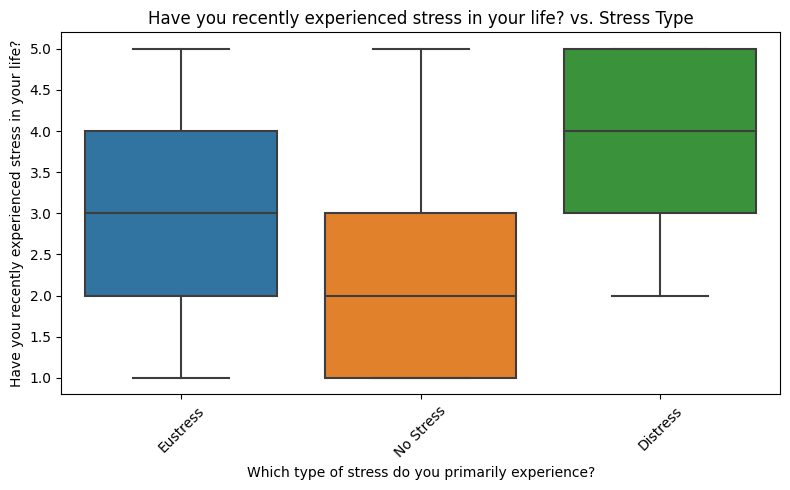

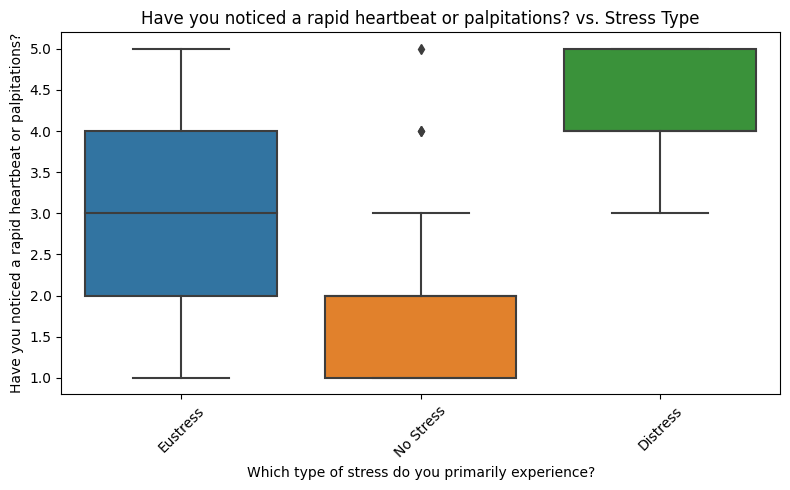

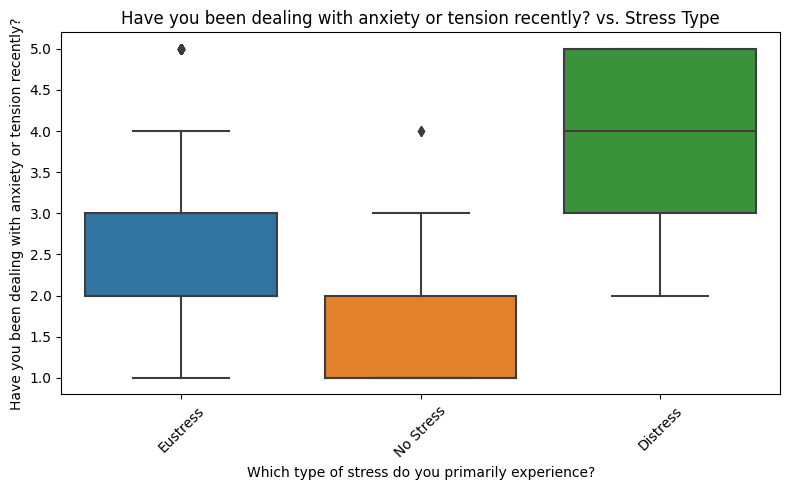

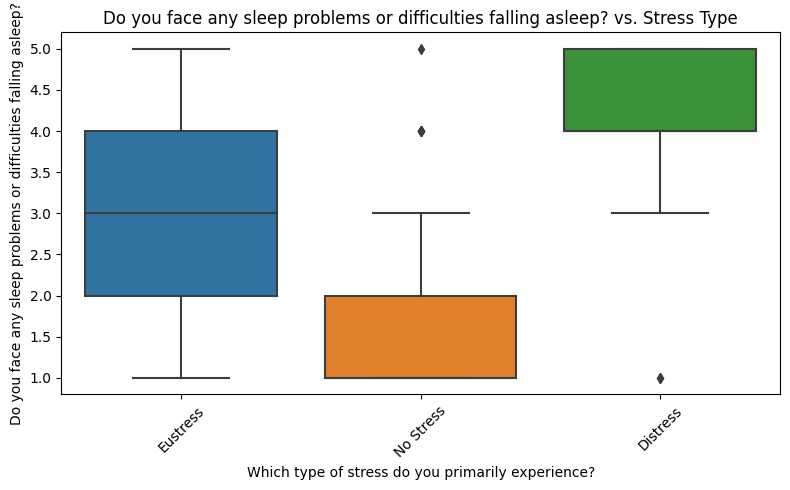

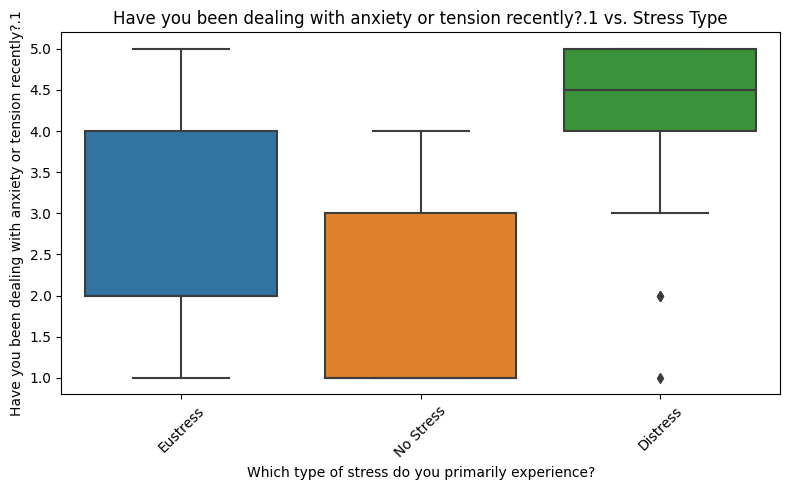

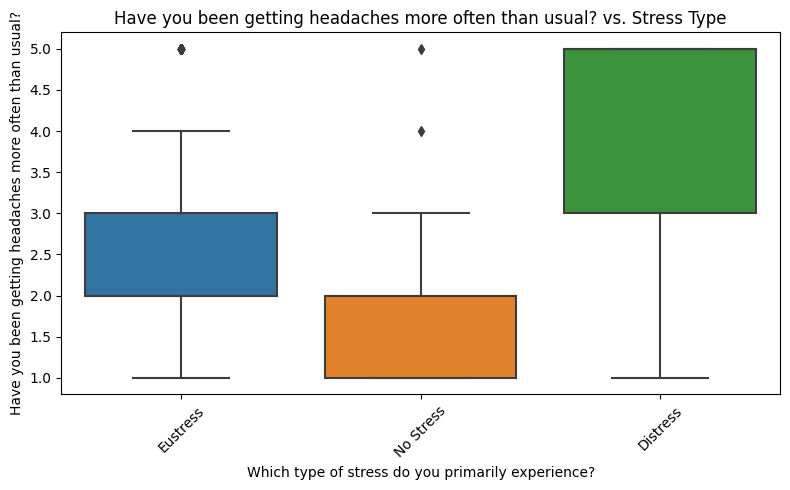

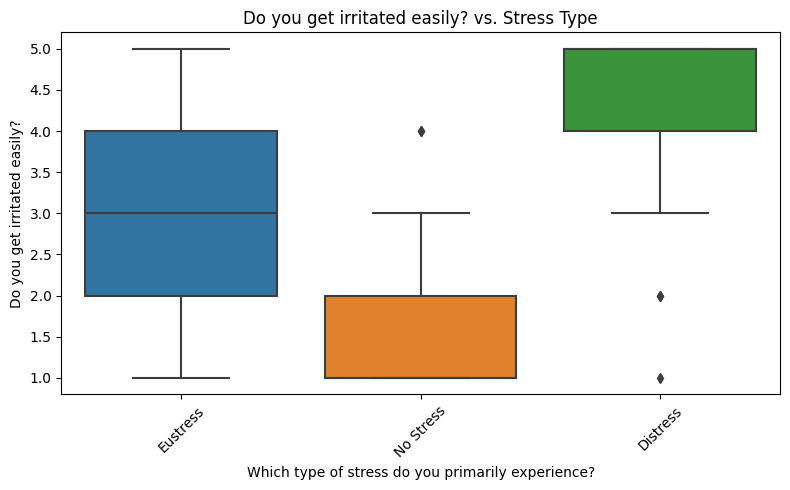

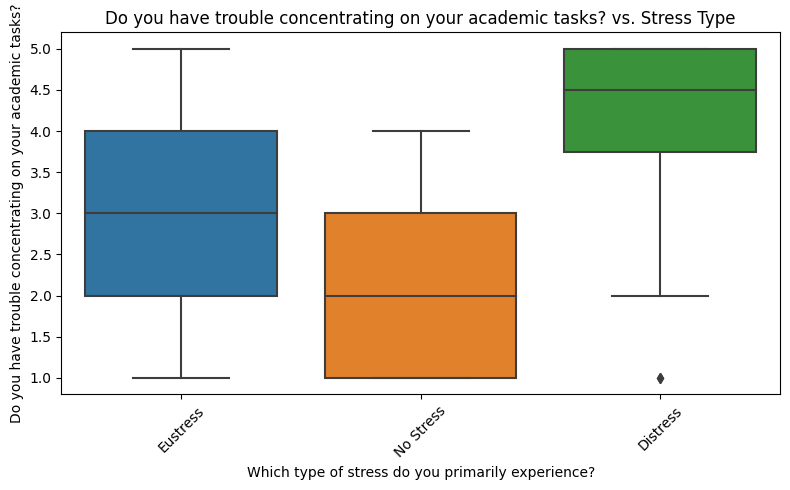

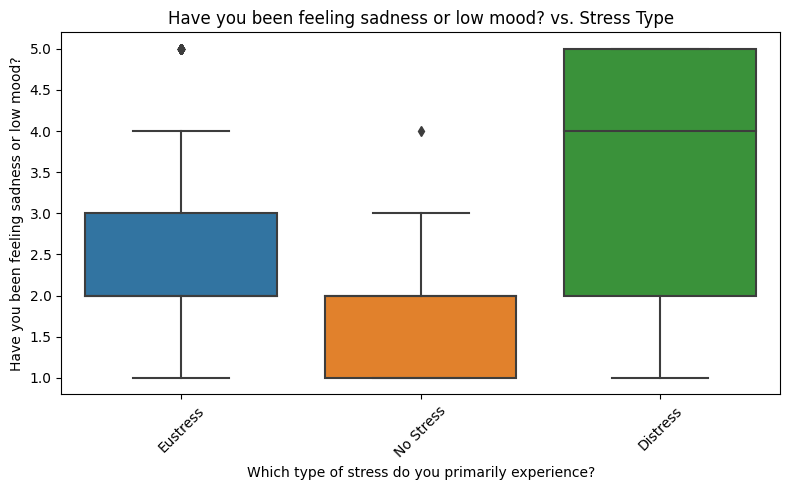

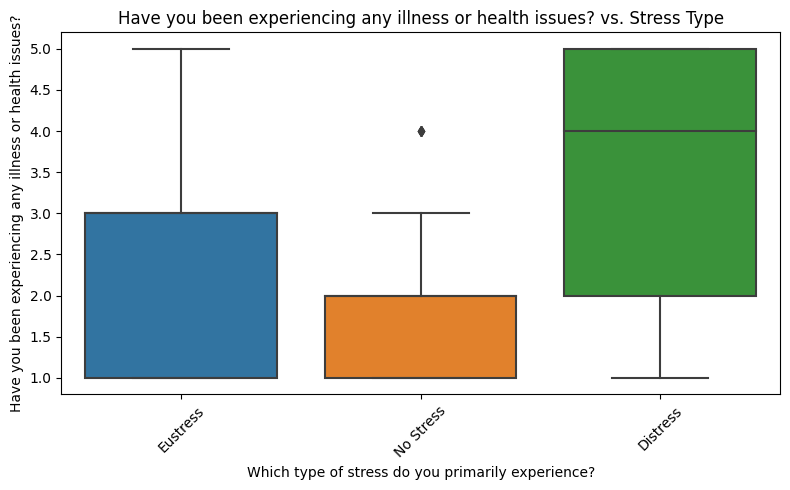

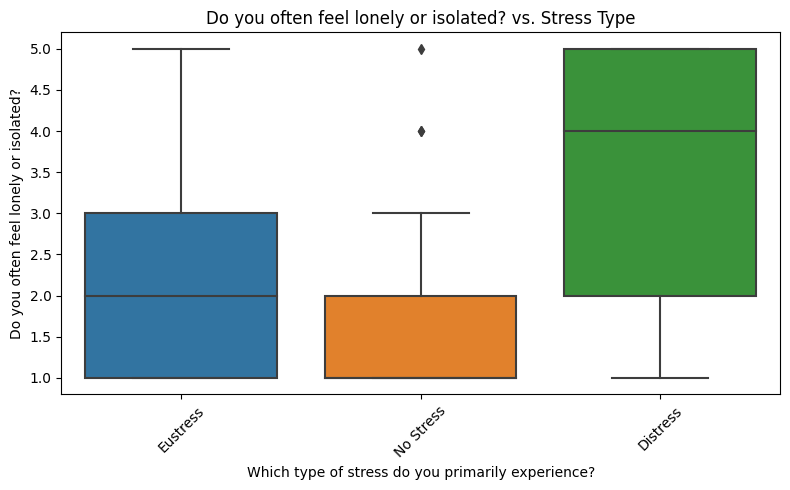

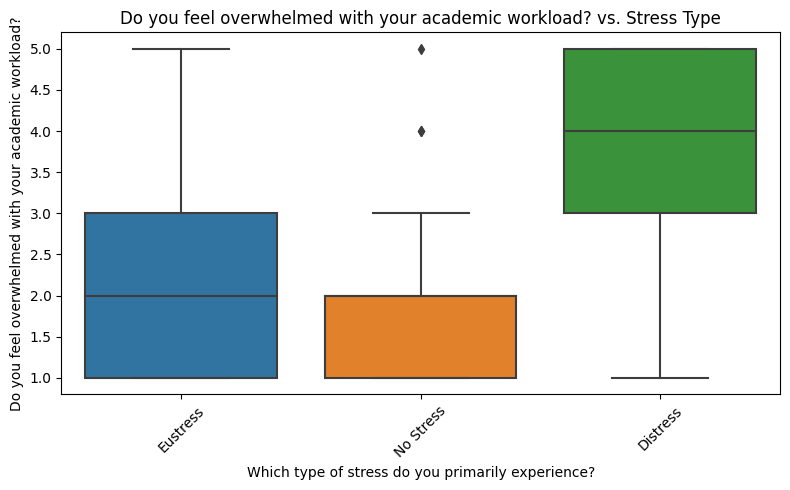

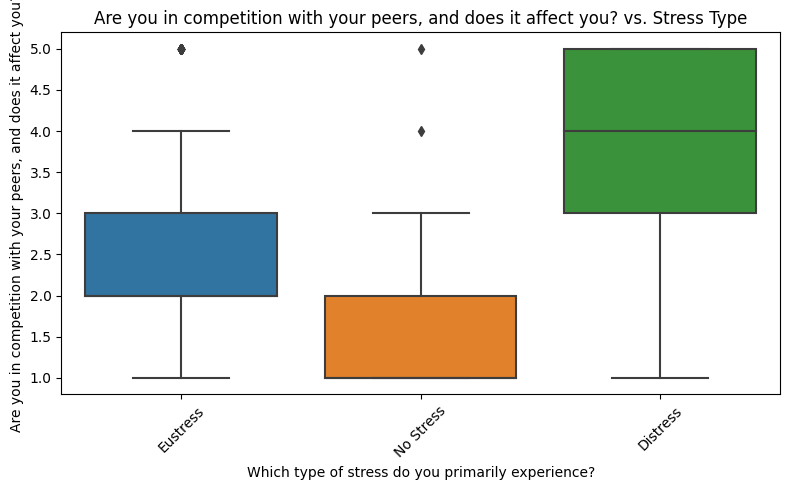

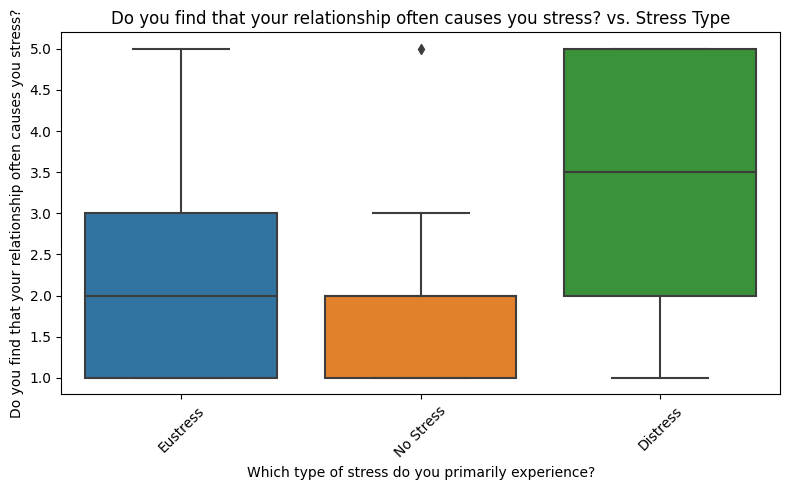

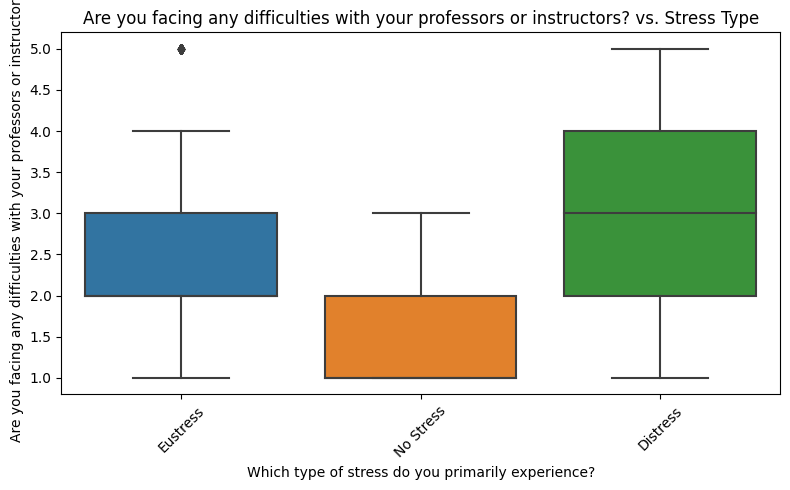

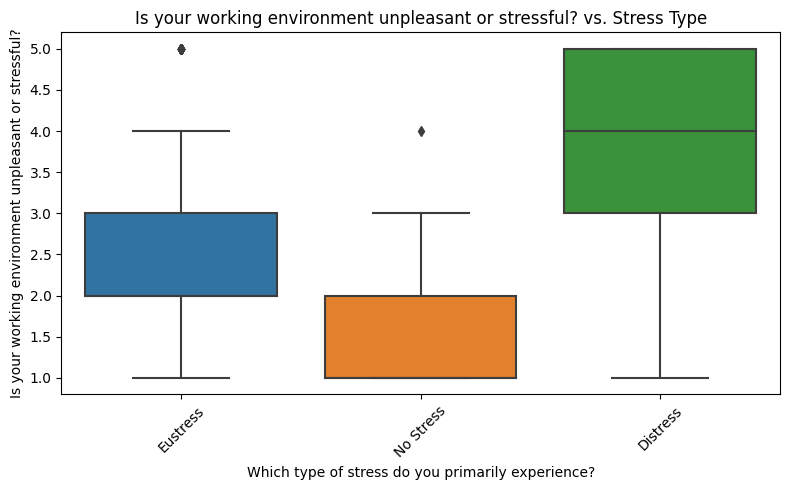

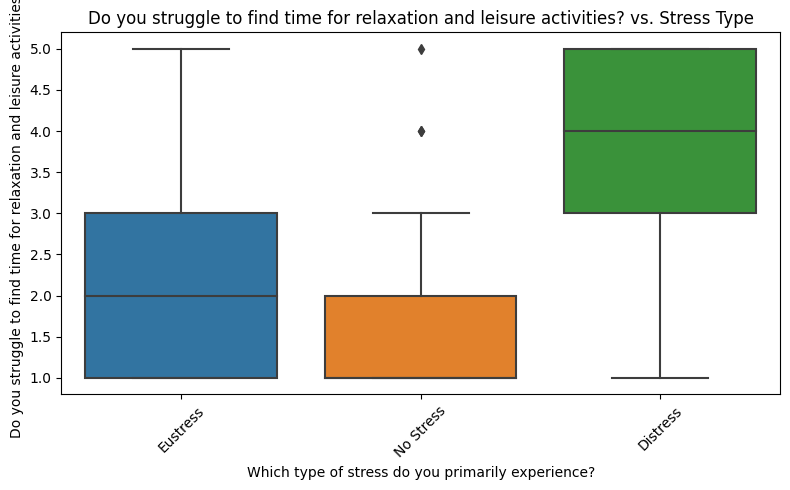

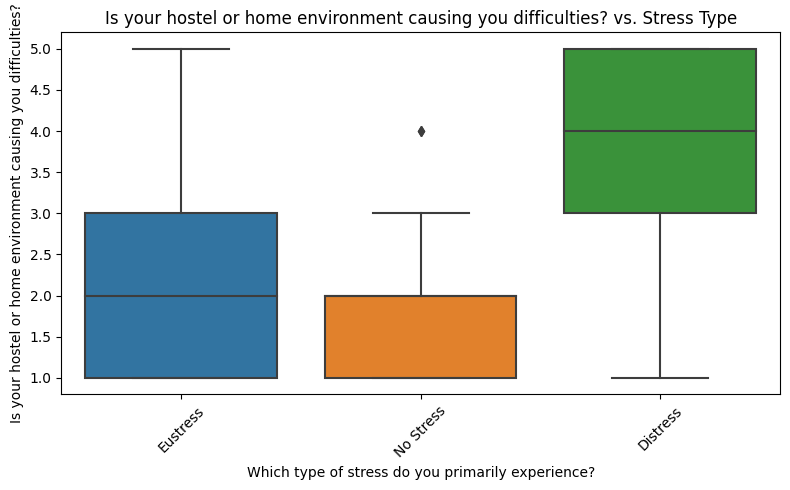

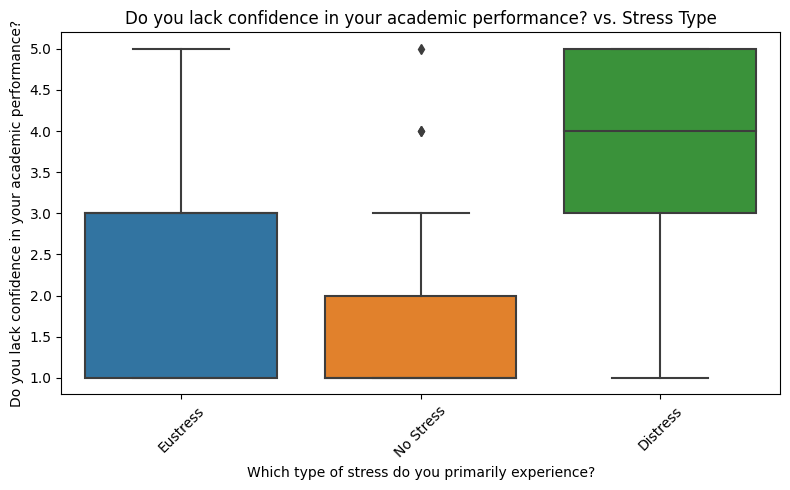

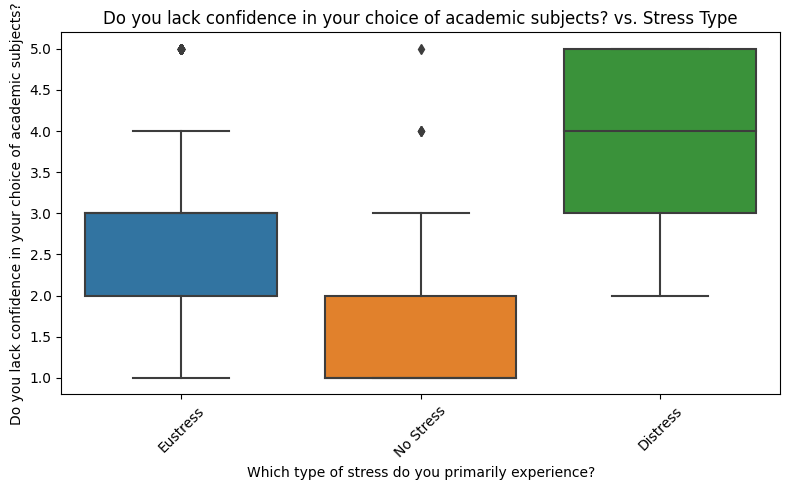

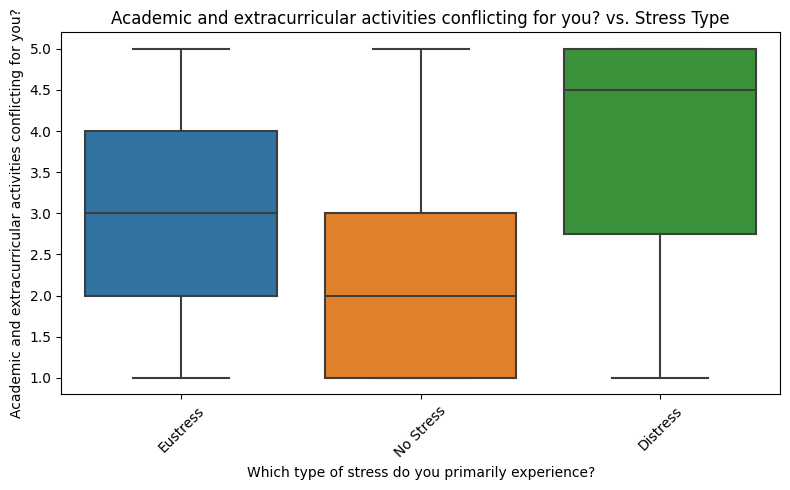

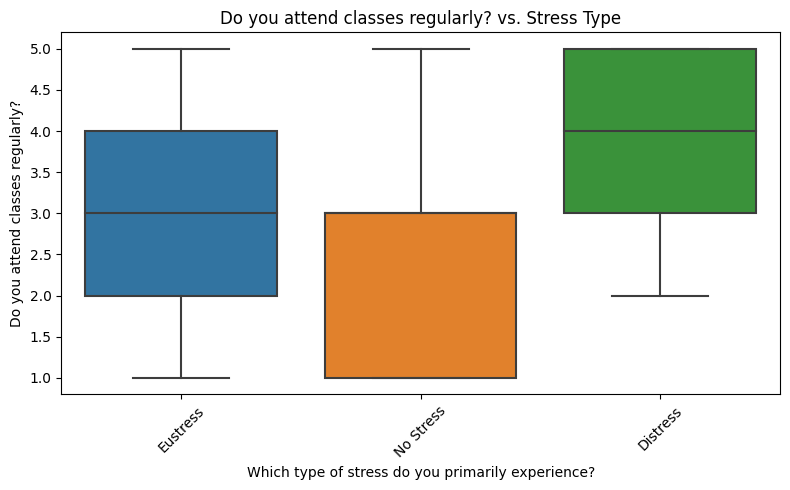

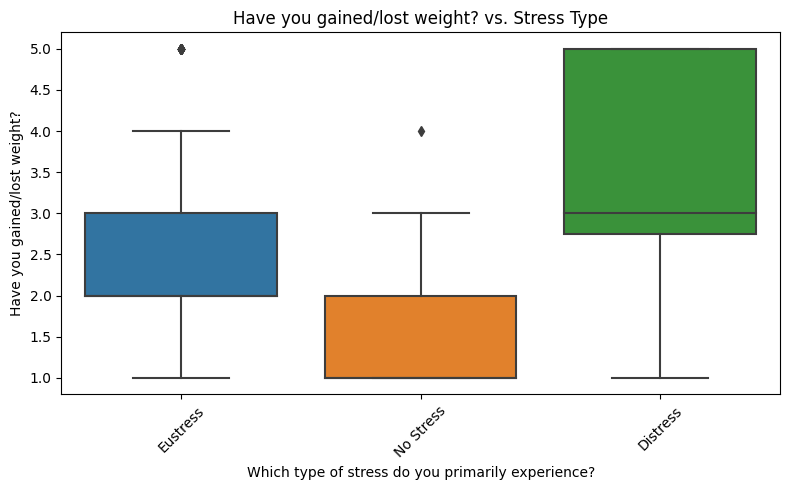

In [23]:
numerical_cols = df.select_dtypes(include='number').columns.drop(['Gender','Age'])
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Which type of stress do you primarily experience?', y=col)
    plt.title(f'{col} vs. Stress Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

All the plots are look similar (they are acutually not numerical.that is why)